In [0]:
# !if [ ! -f ~/.kaggle/kaggle.json ]; then python "from google.colab import files \n files.upload()" && mkdir -p ~/.kaggle && cp kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json; fi

In [0]:
from google.colab import files
files.upload()

{}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets list

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
kaggle/kaggle-survey-2018                                2018 Kaggle ML & DS Survey Challenge                 4MB  2018-11-03 22:35:07           3875  
lava18/google-play-store-apps                            Google Play Store Apps                               2MB  2018-09-18 20:49:49          20868  
olistbr/brazilian-ecommerce                              Brazilian E-Commerce Public Dataset by Olist        42MB  2018-10-31 16:15:27           4488  
census/total-construction-spending-data-collection       Total Construction Spending Data Collection         33KB  2018-11-20 09:33:41            953  
jenny18/honey-bee-annotated-images                       The BeeImage Dataset: Annotated

In [0]:
!kaggle competitions download -c dogs-vs-cats

sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
test1.zip: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!ls

base_dir     sample_data	   test1      train	 train.zip
kaggle.json  sampleSubmission.csv  test1.zip  train_dir


In [0]:
import zipfile
zip_ref = zipfile.ZipFile('test1.zip', 'r')
zip_ref2 = zipfile.ZipFile('train.zip', 'r')
zip_ref.extractall()
zip_ref2.extractall()
zip_ref.close()
zip_ref2.close()

In [0]:
!ls

base_dir     sample_data	   test1      train	 train.zip
kaggle.json  sampleSubmission.csv  test1.zip  train_dir


In [0]:
import os, shutil

In [0]:
original_dataset_dir = "train"
base_dir = "cats_and_dogs_small"
os.mkdir(base_dir)
!ls

cats_and_dogs_small  sample_data	   test1      train	 train.zip
kaggle.json	     sampleSubmission.csv  test1.zip  train_dir


In [0]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
!ls cats_and_dogs_small

train


In [0]:
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
!ls cats_and_dogs_small

train  validation


In [0]:
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
!ls cats_and_dogs_small

test  train  validation


In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

!ls cats_and_dogs_small/train

cats  dogs


In [0]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

!ls cats_and_dogs_small/validation

cats  dogs


In [0]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

!ls cats_and_dogs_small/test

cats  dogs


In [0]:
original_dataset_dir = "train"

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [0]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [0]:
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(validation_cats_dir)))
print(len(os.listdir(test_cats_dir)))
print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(validation_cats_dir)))
print(len(os.listdir(test_cats_dir)))

1000
500
500
1000
500
500


# Model

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [0]:
for data_batch, labels_batch in train_generator:
  print('data batch shape', data_batch.shape)
  print('labels batch shape', labels_batch.shape)  
  break

data batch shape (20, 150, 150, 3)
labels batch shape (20,)


In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 12s 121ms/step - loss: 0.6856 - acc: 0.5455 - val_loss: 0.6309 - val_acc: 0.6540
Epoch 2/30
100/100 [==============================] - 11s 108ms/step - loss: 0.6631 - acc: 0.5950 - val_loss: 0.7822 - val_acc: 0.4050
Epoch 3/30
100/100 [==============================] - 11s 108ms/step - loss: 0.6121 - acc: 0.6685 - val_loss: 0.7512 - val_acc: 0.4820
Epoch 4/30
100/100 [==============================] - 11s 108ms/step - loss: 0.5765 - acc: 0.6940 - val_loss: 0.6461 - val_acc: 0.6230
Epoch 5/30
100/100 [==============================] - 11s 108ms/step - loss: 0.5362 - acc: 0.7185 - val_loss: 0.6908 - val_acc: 0.5850
Epoch 6/30
100/100 [==============================] - 11s 108ms/step - loss: 0.5063 - acc: 0.7610 - val_loss: 0.8301 - val_acc: 0.5190
Epoch 7/30
100/100 [==============================] - 11s 107ms/step - loss: 0.4820 - acc: 0.7740 - val_loss: 0.7576 - val_acc: 0.5970
Epoch 8/30
100/100 [==============================] - 1

In [0]:
model.save('cats_and_dogs_small_1.h5')

In [0]:
!ls

cats_and_dogs_small	  sample_data		test1.zip  train.zip
cats_and_dogs_small_1.h5  sampleSubmission.csv	train
kaggle.json		  test1			train_dir


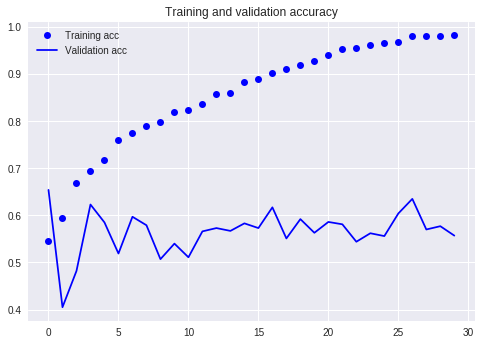

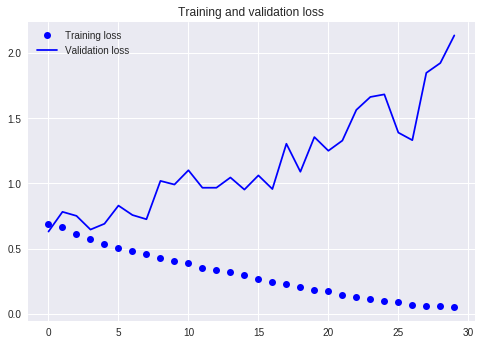

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Data augmentation

In [0]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

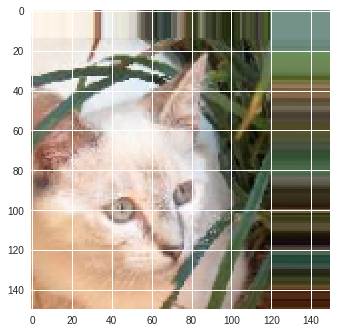

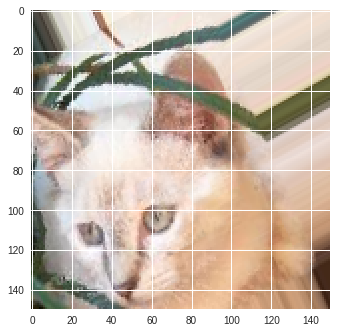

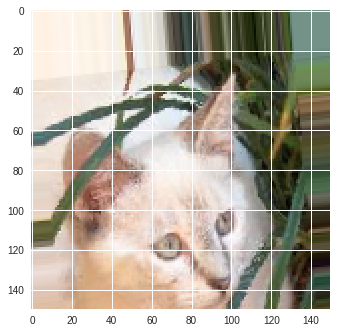

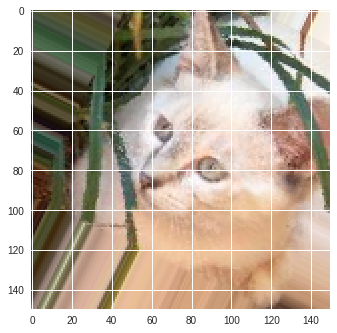

In [0]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i+=1
  if i%4 == 0:
    break

plt.show()

In [0]:
from keras.layers import Dropout

model = models.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 43s 428ms/step - loss: 0.6929 - acc: 0.5200 - val_loss: 0.6707 - val_acc: 0.6335
Epoch 2/100
100/100 [==============================] - 40s 395ms/step - loss: 0.6771 - acc: 0.5769 - val_loss: 0.7141 - val_acc: 0.4781
Epoch 3/100
100/100 [==============================] - 40s 397ms/step - loss: 0.6646 - acc: 0.5953 - val_loss: 0.7521 - val_acc: 0.4305
Epoch 4/100
100/100 [==============================] - 39s 387ms/step - loss: 0.6396 - acc: 0.6397 - val_loss: 0.7538 - val_acc: 0.4749
Epoch 5/100
100/100 [==============================] - 38s 384ms/step - loss: 0.6281 - acc: 0.6356 - val_loss: 0.7613 - val_acc: 0.4806
Epoch 6/100
100/100 [==============================] - 39s 390ms/step - loss: 0.6085 - acc: 0.6703 - val_loss: 0.7587 - val_acc: 0.4944
Epoch 7/100
100/100 [==============================] - 39s 389ms/step - loss: 0.5981 - acc: 0.6784 - val_loss: 0.7066 - val_acc: 0.5570
Epoch 8/100
100/100 [===========================

In [0]:
model.save('cats_and_dogs_small_2.h5')

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()